In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [ ]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        y_i = y[i]

        cost += (f_wb - y_i) ** 2

    cost = cost / 2 * m
    return cost


In [ ]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b

        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += f_wb - y[i]

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [ ]:
def grad_descent(x, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient):
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        b -= alpha * dj_db
        w -= alpha * dj_dw

        if i < 100000:  # prevent resource exhaustion
            J_history.append(compute_cost(x, y, w, b))
            p_history.append([w, b])
            # Print cost every at intervals 10 times or as many iterations if < 10
            if i % math.ceil(num_iters / 10) == 0:
                print(
                    f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                    f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                    f"w: {w: 0.3e}, b:{b: 0.5e}",
                )

    return w, b, J_history, p_history


In [ ]:
x = np.array([x + 2 for x in range(1, 10)])
y = np.array([10 * x for x in range(1, 10)])

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = grad_descent(
    x, y, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient
)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 2.59e+04  dj_dw: -4.167e+02, dj_db: -5.000e+01   w:  4.167e+00, b: 5.00000e-01
Iteration 1000: Cost 2.00e+02  dj_dw: -9.557e-02, dj_db:  7.584e-01   w:  9.190e+00, b:-1.35745e+01
Iteration 2000: Cost 1.89e+01  dj_dw: -2.938e-02, dj_db:  2.331e-01   w:  9.751e+00, b:-1.80248e+01
Iteration 3000: Cost 1.79e+00  dj_dw: -9.031e-03, dj_db:  7.166e-02   w:  9.923e+00, b:-1.93928e+01
Iteration 4000: Cost 1.69e-01  dj_dw: -2.776e-03, dj_db:  2.203e-02   w:  9.976e+00, b:-1.98134e+01
Iteration 5000: Cost 1.60e-02  dj_dw: -8.533e-04, dj_db:  6.772e-03   w:  9.993e+00, b:-1.99426e+01
Iteration 6000: Cost 1.51e-03  dj_dw: -2.623e-04, dj_db:  2.082e-03   w:  9.998e+00, b:-1.99824e+01
Iteration 7000: Cost 1.43e-04  dj_dw: -8.063e-05, dj_db:  6.399e-04   w:  9.999e+00, b:-1.99946e+01
Iteration 8000: Cost 1.35e-05  dj_dw: -2.479e-05, dj_db:  1.967e-04   w:  1.000e+01, b:-1.99983e+01
Iteration 9000: Cost 1.27e-06  dj_dw: -7.619e-06, dj_db:  6.046e-05   w:  1.000e+01, b:-1.99995e+01


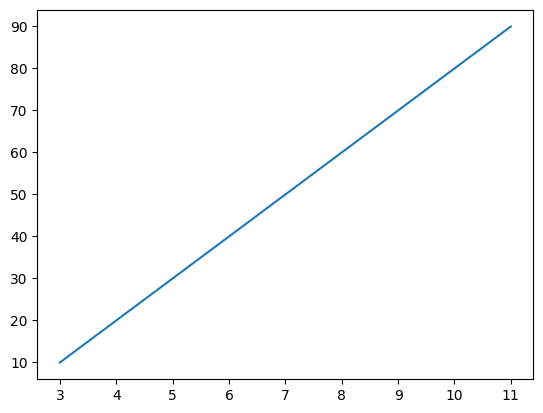

In [ ]:
plt.plot(x, y)
plt.show()

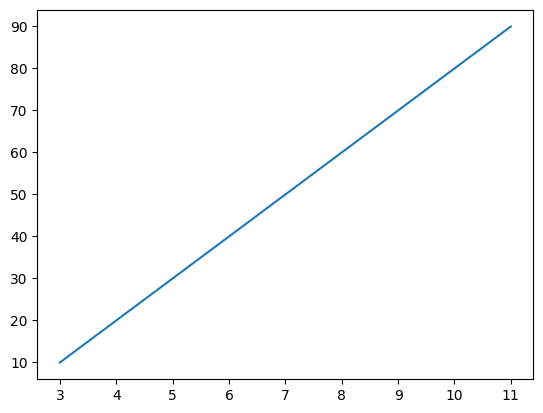

In [ ]:
ans_arr = np.array([(w_final * x + b_final) for x in range(3,12)])
ans_y = np.array([x for x in range(3,12)])

plt.plot(ans_y, ans_arr)
plt.show()